# Machine Learning Homework 1 (deadline: September 24th, 10:15)

#### Plagiarism disclaimer

We would like you to write all the algorithms by yourself, because it helps you to understand and remember them. However, you have an option to use some pieces of code from public external sources (e.g. Stack Overflow), but only with proper citation. In this case you can receive 80% max per each task where you used public external code. If you use but don't cite a piece of public external code then we consider it to be plagiarism. Use of external code that is not publicly available online is forbidden. 

NB! For visualization purposes (plotting) you may use any code you want, not much to understand there.

If you get caught with a clear case of plagiarism:

- If there are no previous problems depending on the situation you might get away with just getting 0 points for the task and get a warning from us. Note that the curriculum manager would also be informed.
- If the problem appears several times or we know that you have already warnings from other courses, the dean's office will be informed and this can lead to expelling.


## Task 0. 
### <font color='purple'>Use Python to print "Hello World! I will not plagiarize!". Here and in the following the ellipsis (...) stands for a place which needs to be replaced with your own code.</font>

In [1]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

### <font color='purple'>Please make sure that you have all the following packages installed: </font>

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import defaultdict
plt.style.use('seaborn-whitegrid') # Plot style

In [3]:
from numpy.random import multivariate_normal, seed
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Task 1. Basic linear classifier (1 point)

#### <font color='purple'>(a) Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) and define a `pandas` dataframe using the arrays given below. Please store your dataframe in the variable `data`. It should contain 3 columns and 12 rows. 

In [4]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

# YOUR CODE STARTS
data = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y})
# YOUR CODE ENDS

data # this will show the first lines of the dataframe, helping us to check whether you got it right

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1
5,9,3,1
6,0,4,-1
7,1,8,-1
8,2,6,-1
9,4,10,-1


#### <font color='purple'>(b) Plot your data in axes `x1` and `x2`, highlight two classes with different colors, name the axes.

Feel free to use techniques from the notebook of the first practice session

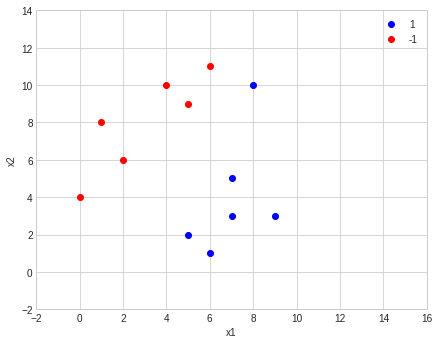

In [5]:
def plot_data(data):
    # Plot function goes here
    # We suggest to use plt.plot(...) for each class
    # YOUR CODE STARTS
    fig = plt.figure(figsize=(7, 5.5)) 
    
    plt.plot(data[data['y'] == 1]['x1'], data[data['y'] == 1]['x2'], 'bo', label = '1')
    plt.plot(data[data['y'] == -1]['x1'], data[data['y'] == -1]['x2'], 'ro', label = '-1')
    plt.legend(markerscale=1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2, 16)
    plt.ylim(-2, 14)
    

    # YOUR CODE ENDS
    
plot_data(data)
plt.show()

#### <font color='purple'>(c) Find and highlight in the plot the center of mass for each of two classes as well as the middle point between these centers. </font>

Center of mass for class +1: (7.000000,4.000000)
Center of mass for class -1: (3.000000,8.000000)
Middle point between the two centers: (5.000000,6.000000)


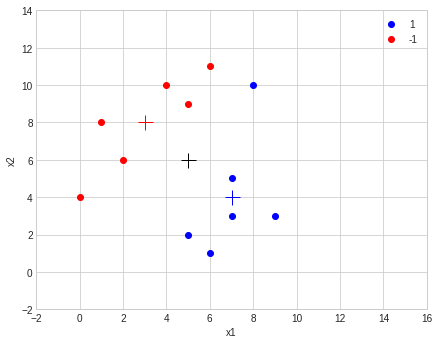

In [6]:
# Calculate values for pos_c1, pos_c1, neg_c1, neg_c2, m1, m2 which will all be printed below
# YOUR CODE STARTS
pos_c1 = np.mean(data[data['y'] == 1]['x1'])
pos_c2 = np.mean(data[data['y'] == 1]['x2'])
neg_c1 = np.mean(data[data['y'] == -1]['x1'])
neg_c2 = np.mean(data[data['y'] == -1]['x2'])
m1 = (pos_c1 + neg_c1) / 2
m2 = (pos_c2 + neg_c2) / 2
plot_data(data)
plt.plot(pos_c1, pos_c2, 'b+', markersize=15, label='average pos')
plt.plot(neg_c1, neg_c2, 'r+', markersize=15, label='average neg')
plt.plot(m1, m2, 'k+', markersize=15, label='mid point')
# YOUR CODE ENDS


print("Center of mass for class +1: (%f,%f)" % (pos_c1,pos_c2))
print("Center of mass for class -1: (%f,%f)" % (neg_c1,neg_c2))
print("Middle point between the two centers: (%f,%f)" % (m1,m2))

#### <font color='purple'>(d) Find (or guess) the equation of the decision boundary line chosen by the basic linear classifier. For this you might need to use the positions of centers of mass and the middle point between them. Formula of a line through two points can help also:</font>

$\frac{x-x_1}{x_2-x_1} = \frac{y-y_1}{y_2-y_1}$

Answer: y = x + 1

#### <font color='purple'>(e) Plot the data together with the decision boundary line chosen by the basic linear classifier. For this you can make use of the equation that you obtained in the previous subtask.</font>

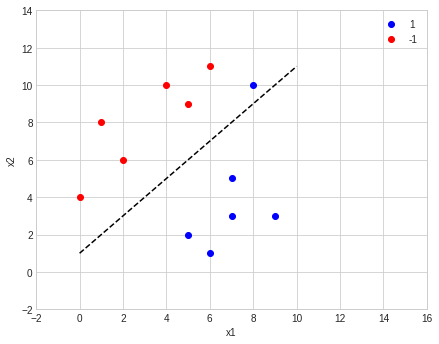

In [7]:
plot_data(data) # first plot the data points

# Write code to draw the line. Hint: you can use plt.plot(...) again 
# YOUR CODE STARTS
plt.plot([0, 5, 10], [1, 6, 11], 'k--')
# YOUR CODE ENDS

plt.show()

#### <font color='purple'>(f) Are there any misclassified instances? If yes, then please write their coordinates.</font>

Answer: (8, 10)

#### <font color='purple'>(g) Are the classes linearly separable in the training data? If yes, then please report one line which separates the classes, by writing down its equation.</font>

Answer: y = x + 1

#### <font color='purple'>(h) Did you get help in this task from public external code (yes/no). If yes, then please provide the link also.</font>

Answer: no

## Task 2. Perceptron (1 point)

#### <font color='purple'>(a) Implement the perceptron algorithm based on pseudocode from the first lecture: </font>

<img src="perceptron_algorithm.png" alt="perceptron_algorithm" style="width: 400px;"/>

<font color='purple'>**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html), it could be useful, you may want to refresh your memories about the [dot product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) as well. Your final plot should be a picture similar to this:
<img src="perceptron_result.png" alt="perceptron_result" style="width: 300px;"/></font>

[1.0, 16.0, -10.0]


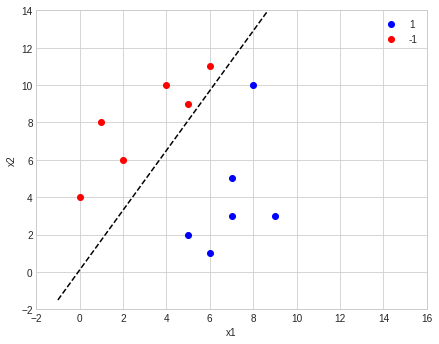

In [8]:
def perceptron(data, w=[0,0,0], learning_rate=1):
    # Write the code to train the perceptron, putting the final weights in variable `w` 
    # Optional challenge: Can you do it with less than 10 lines of code? (no extra points for this)
    # YOUR CODE STARTS
    converged = False
    while not converged:
        converged = True
        for i in range(len(data)):
            x = data.loc[i][['x0', 'x1', 'x2']]
            y = data.loc[i]['y']
            pred = x.dot(w)
            if y * pred <= 0:
                converged = False
                w[0] = w[0] + learning_rate * y * x['x0']
                w[1] = w[1] + learning_rate * y * x['x1']
                w[2] = w[2] + learning_rate * y * x['x2']
    return w

data['x0'] = np.ones(len(data)) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]  # Make column reordering
w = perceptron(data)
print(w)
plot_data(data)
# Finally plot the resulting decision boundary line
# YOUR CODE STARTS
x = np.arange(-1,10,0.1)
y = (w[1] * x + w[0]) / w[2] * (-1)
plt.plot(x, y, "k--")
# YOUR CODE ENDS
plt.show()

#### <font color='purple'>(b) Did you get help from public external code (yes/no). If yes, then please provide the link also.</font>

Answer: no

## Task 3. Probability theory (1 point)

To solve the following exercises we recommend to read the first 5 chapters on Probability theory from MathWiki web-site: http://mathwiki.cs.ut.ee/probability_theory
(1. Event and probability; 2. Probability of two events; 3. Conditional probability; 4. Total probability and 5. Expected value). We also recommend that you solve all the exercises given in MathWiki site for training purposes.

<font color='red'>**When answering the following questions don't only write the answer, but also the way to the solution. Also express the answer as a probability (e.g. $P(accept=good)$) in addition to showing the value of the probability.**</font>

*The dataset below includes data about car evaluation (attribute "accept") based on six input attributes.*

<img src="minicars.png" alt="Dataset" style="width: 500px;"/>

#### <font color='purple'>(a) Given the data above, find the probability of a randomly selected car to be evaluated as “good”. Please explain how you got the answer.

Answer: $$P(accept=good) = 1 / 10 $$ Explanation: ...

#### <font color='purple'>(b) If we evaluate 2 independently selected random cars (it could be the same car twice), what is the probability of both of them evaluated as “good”. Please explain how you got the answer.</font>

Answer: $$P(accept_1=good,accept_2=good) = 1/100$$

Explanation: ...

#### <font color='purple'>(c) Find the probability that a randomly selected car is evaluated either “good” or very good (“vgood”). Please explain how you got the answer.

Answer: 3 / 10

Explanation: ...

#### <font color='purple'>(d) What is the probability of a randomly selected car to be evaluated as unacceptable (“unacc”) given that it can accommodate 2 persons. Please explain how you got the answer.</font>

Answer: 1

Explanation: ...

#### <font color='purple'>(e) Are the events `doors<4` and `accept=acc` independent? Please explain how you got the answer.</font>

Answer: No

Explanation: ...

#### <font color='purple'>(f) Express the following probability using the Bayes' rule.</font>

Answer: $$P(accept=vgood\;|\; buying=med,\; maint=med) = ...$$

##  Task 4. Naive Bayes (2 points)

In this exercise you will program your own Naive Bayes algorithm and compare it to sklearn's BernoulliNB implementation. We will use **car.csv** dataset for this.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [26]:
data = pd.read_csv("car.csv", dtype="category", header = None)
data.columns = ["buying", "maint", "doors", "persons", "lug-boot", "safety", "accept"]

In [27]:
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug-boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### <font color='purple'>(a) Use the train_test_split method to divide the data into 75% training and 25% testing data. Use parameter random_state = 0 to set the same random seed and ensure that we all get the same results.</font>

In [28]:
# YOUR CODE STARTS
X_train, X_test, y_train, y_test = train_test_split(data[data.columns].drop('accept', axis = 1), data['accept'])
# YOUR CODE ENDS
# This is for us to check that the resulting datasets have the correct shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

#### <font color='purple'>(b) Now implement your own Naive Bayes method. We have prepared a class MyNaiveBayes where you can fill in the methods. Don't worry about the implementation speed at the moment, although, if you are experienced with Python you can try to come up with an implementation that would also be efficient. Feel free to add methods or change the existing ones, but make sure that the functions **fit** and **predict** will still be in the class with exactly the same signatures. They will be used below to test your implementation.</font>

In [29]:
￼
(c) Find and highlight in the plot the center of mass for each of two classes as well as the middle point between these centers. 
In [6]:
￼
# Calculate values for pos_c1, pos_c1, neg_c1, neg_c2, m1, m2 which will all be printed below
# YOUR CODE STARTS
pos_c1 = np.mean(data[data['y'] == 1]['x1'])
pos_c2 = np.mean(data[data['y'] == 1]['x2'])
neg_c1class MyNaiveBayes:
    
    def fit(self, data, labels):
        # use this method to learn the model
        # if you feel it is easier to calculate priors and likelihoods at the same time
        # then feel free to change this method
        data_copy = data.copy()
        self.labels = labels.unique()
        self.priors = self.calculate_priors(labels)
        self.likelihoods = self.calculate_likelihoods(data_copy, labels)
        
    def predict(self, data):
        # YOUR CODE STARTS
        m = data.apply(lambda x: self.predict_sample(x), axis = 1)
        return m
        # YOUR CODE ENDS
        
    def predict_sample(self, sample):
        likelihood = {}
        for label in self.labels:
            likelihood[label] = [self.likelihoods[key][sample[key]][label] if label in self.likelihoods[key][sample[key]].keys() else 0 for key in sample.keys()]
            likelihood[label] = np.prod(likelihood[label]) * self.priors[label]
        return max(likelihood, key=likelihood.get)
        
    def calculate_priors(self, train_labels):
        # YOUR CODE STARTS
        return train_labels.value_counts() / len(train_labels)
        # YOUR CODE ENDS

    def calculate_likelihoods(self, train_data, train_labels):
        # YOUR CODE STARTS
        train_data['label'] = train_labels
        likelihoods = {}
        for feature in train_data.columns:
            likelihoods[feature] = train_data.groupby([feature, 'label'])['label'].count() / train_data.groupby(['label'])['label'].count()
        return likelihoods
        # YOUR CODE ENDS

#### <font color='purple'>(c) Call out your method and calculate the train and test accuracies.</font>

In [30]:
print(X_train.columns)
my_nb = MyNaiveBayes()
my_nb.fit(X_train, y_train)
preds_train = my_nb.predict(X_train)
preds_test = my_nb.predict(X_test)
print(X_train.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug-boot', 'safety'], dtype='object')
Index(['buying', 'maint', 'doors', 'persons', 'lug-boot', 'safety'], dtype='object')


In [31]:
print(sum(preds_test == y_test))
# YOUR CODE STARTS
train_accuracy = sum(preds_train == y_train) / len(y_train)
test_accuracy = sum(preds_test == y_test) / len(y_test)
# YOUR CODE ENDS
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

369
Train accuracy:  0.871141975308642
Test accuracy:  0.8541666666666666


#### <font color='purple'>(d) Use `BernoulliNB` of `sklearn` and calculate its train and test accuracies. Remember that you cannot feed in the dataset with categorical features to sklearn models. You have to do a transformation first (consult the tutorial if you don't remember).</font>

In [32]:
nb = BernoulliNB()
# YOUR CODE STARTS
X_train_dummies = pd.get_dummies(X_train, columns = X_train.columns)
X_test_dummies = pd.get_dummies(X_test, columns = X_test.columns)
nb.fit(X_train_dummies, y_train)
preds_train = nb.predict(X_train_dummies)
preds_test = nb.predict(X_test_dummies)
train_accuracy = sum(preds_train == y_train) / len(y_train)
test_accuracy = sum(preds_test == y_test) / len(y_test)
# YOUR CODE ENDS
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.8780864197530864
Test accuracy:  0.8587962962962963


#### <font color='purple'>(e) Accuracies achieved by your implementation and BernoulliNB can be slightly different. Try to read the description of `BernoulliNB` from `sklearn` documentation and try to guess what might be the reasons.</font>

Answer: 

## Task 5. Comparison of different supervised learning methods (1 point)

In this task you will compare the performance of `sklearn` implementations of studied methods ([perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html) and [KNN](http://scikit-learn.org/stable/modules/neighbors.html)) for different types of datasets (separable, overlapped, hammer).

Below you can find helper functions that we wrote for you and one example.

In [4]:
def make_gaussian_data(n_samples,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=0):
    seed(random_state)
    n_pos = round(n_samples/2)
    n_neg = n_samples - n_pos
    pos = multivariate_normal(pos_mean,np.array(pos_covariance_diag)*np.identity(2),n_pos)
    neg = multivariate_normal(neg_mean,np.array(neg_covariance_diag)*np.identity(2),n_neg)
    df_train = pd.DataFrame(pos).append(pd.DataFrame(neg))
    df_train.columns = ('x','y')
    df_train['c'] = n_pos*['pos'] + n_neg*['neg']
    df_train.c = df_train.c.astype('category')
    X_train = df_train.drop('c',axis=1)
    y_train = df_train.c
    return X_train,y_train

def make_gaussian_train_test(n_train,n_test,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=0):
    return make_gaussian_data(n_train,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=random_state) + \
        make_gaussian_data(n_test,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=random_state+1)

In [5]:
def make_round_blobs(n_train=100,n_test=1000,separation=2,random_state=0):
    return make_gaussian_train_test(n_train,n_test,(-separation/2.0,0),(1,1),(+separation/2.0,0),(1,1),random_state=random_state)
  
def make_hammer(n_train=100,n_test=1000,random_state=0):
    return make_gaussian_train_test(n_train,n_test,(+2,+2),(1,4),(-8,0),(20,1),random_state=random_state)

In [6]:
all_datasets = {
    'round_overlap': make_round_blobs(separation=2),
    'round_separable': make_round_blobs(separation=4),
    'hammer': make_hammer(random_state=2),
    'round_overlap_20': make_round_blobs(n_train=20,separation=2),
    'round_overlap_50': make_round_blobs(n_train=50,separation=2),
    'round_overlap_100': make_round_blobs(n_train=100,separation=2),
    'round_overlap_200': make_round_blobs(n_train=200,separation=2),
    'round_overlap_500': make_round_blobs(n_train=500,separation=2),
    'round_overlap_1000': make_round_blobs(n_train=1000,separation=2),
}

In [7]:
all_classifiers = {
    'most_frequent_class': DummyClassifier(strategy='most_frequent'),
    'uniform_random': DummyClassifier(strategy='uniform',random_state=0),
    'knn1': KNeighborsClassifier(n_neighbors=1),
    'knn3': KNeighborsClassifier(n_neighbors=3),
    'knn5': KNeighborsClassifier(n_neighbors=5),
    'knn7': KNeighborsClassifier(n_neighbors=7),
    'knn9': KNeighborsClassifier(n_neighbors=9),
    'knn25': KNeighborsClassifier(n_neighbors=25),
    'knn75': KNeighborsClassifier(n_neighbors=75),
    'naive_bayes': GaussianNB(),
    'perceptron': Perceptron()
}

In [8]:
def create_grid(X_train):
    x = np.arange(min(X_train.x),max(X_train.x), (max(X_train.x)-min(X_train.x))/100 )
    y = np.arange(min(X_train.y),max(X_train.y), (max(X_train.y)-min(X_train.y))/100 )
    xx, yy = np.meshgrid(x, y)
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    X_grid[y_pred=='pos'].plot(x='x',y='y',kind='scatter',s=20,color='red',ax=ax)
    X_grid[y_pred=='neg'].plot(x='x',y='y',kind='scatter',s=20,color='blue',ax=ax)
    X_train[y_train=='pos'].plot(x='x',y='y',kind='scatter',s=40,color='pink',ax=ax)
    X_train[y_train=='neg'].plot(x='x',y='y',kind='scatter',s=40,color='lightblue',ax=ax);
    
def plot_models_datasets(model_names,dataset_names,datasets_in_rows=False,plot_width=5,plot_height=5):
    n_row = len(model_names)
    n_col = len(dataset_names)
    if datasets_in_rows: # if datasets should be in rows not columns then swap the rows and columns
        n_row,n_col = n_col,n_row 
    fig, axes = plt.subplots(n_row,n_col,figsize=(n_col*plot_width,n_row*plot_height))
    for row in range(n_row):
        for col in range(n_col):
            if datasets_in_rows: # depending on whether datasets should be in rows or columns
                dataset_name = dataset_names[row]
                model_name = model_names[col]
            else:
                dataset_name = dataset_names[col]
                model_name = model_names[row]
            X_train,y_train,X_test,y_test = all_datasets[dataset_name]
            X_grid = create_grid(X_test) # create the grid of instances to show decision regions
            model = all_classifiers[model_name].fit(X_train,y_train)
            y_pred = model.predict(X_test)
            accuracy = sum(y_pred==y_test)/len(y_test)
            if (n_row==1) and (n_col==1): # support for plots with only 1 plot
                ax = axes
            elif n_col==1: # support for plots with only 1 column
                ax = axes[row]
            elif n_row==1: # support for plots with only 1 row
                ax = axes[col]
            else:
                ax = axes[row,col]
            ax.set_aspect(aspect='equal') # make sure the x and y scales have equal aspect
            ax.set_title(dataset_name+' : ' + model_name + ' : test_acc=' + str(accuracy))
            plot_model(ax,X_train,y_train,X_grid,model);
    plt.show()

Have a look at the code defining all_datasets and all_classifiers. These are the datasets and classifiers that you will analyze in the following tasks. To answer the following questions you can plot the decision boundaries of classifiers on these datasets as follows:

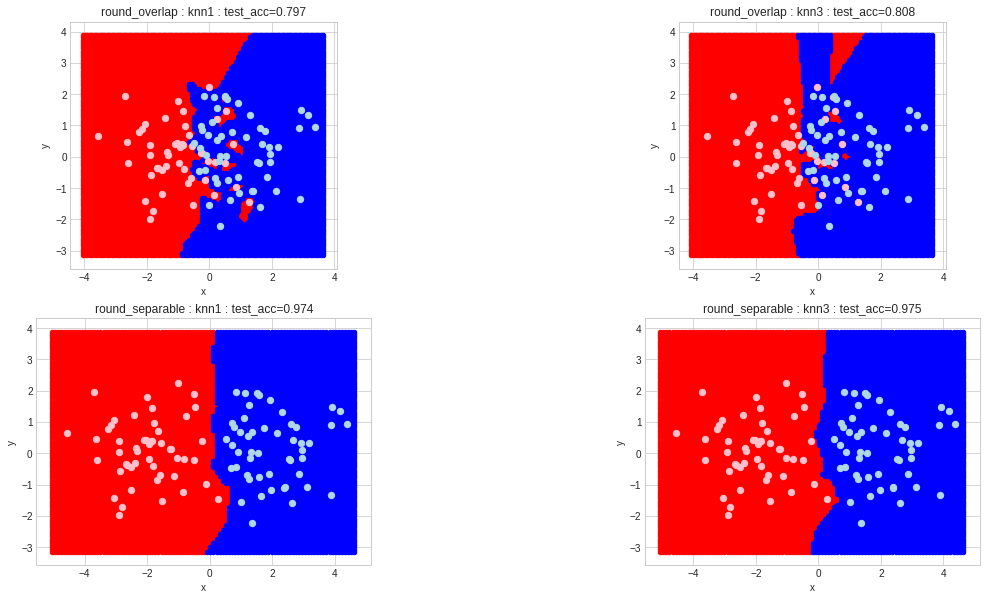

In [9]:
plot_models_datasets(model_names=['knn1','knn3'], 
                     dataset_names=['round_overlap','round_separable'],
                     datasets_in_rows=True, plot_width=10, plot_height=5)

The function plot_models_datasets takes a list of classifier names, a list of datasets, a boolean stating whether you want to have datasets in rows or columns, and two numbers stating the width and height of one plot. Note that the sizes are rescaled automatically to make sure that aspect ratio is preserved.

The circles on these plots represent training data points (positives shown in pink and negatives in light blue). Accuracy on test data is given in the caption of each plot but the test data are not shown. The background colours indicate the decision regions of the classifier. The red background corresponds to the region where the classifier predicts positive, and blue where it predicts negative.

The datasets round_overlap, round_separable and hammer all have 100 training instances with 50 in both classes. In datasets round_overlap_20, ..., round_overlap_1000 the number indicates the size of the training set. 

### K-nearest neighbours

Study the behaviour and accuracy of KNN across different values of K and different datasets.
#### <font color='purple'>(a) On which of the datasets round_overlap, round_separable and hammer is K=1 performing good or bad (compared to other values of K)? Explain why (in 1 paragraph).</font>

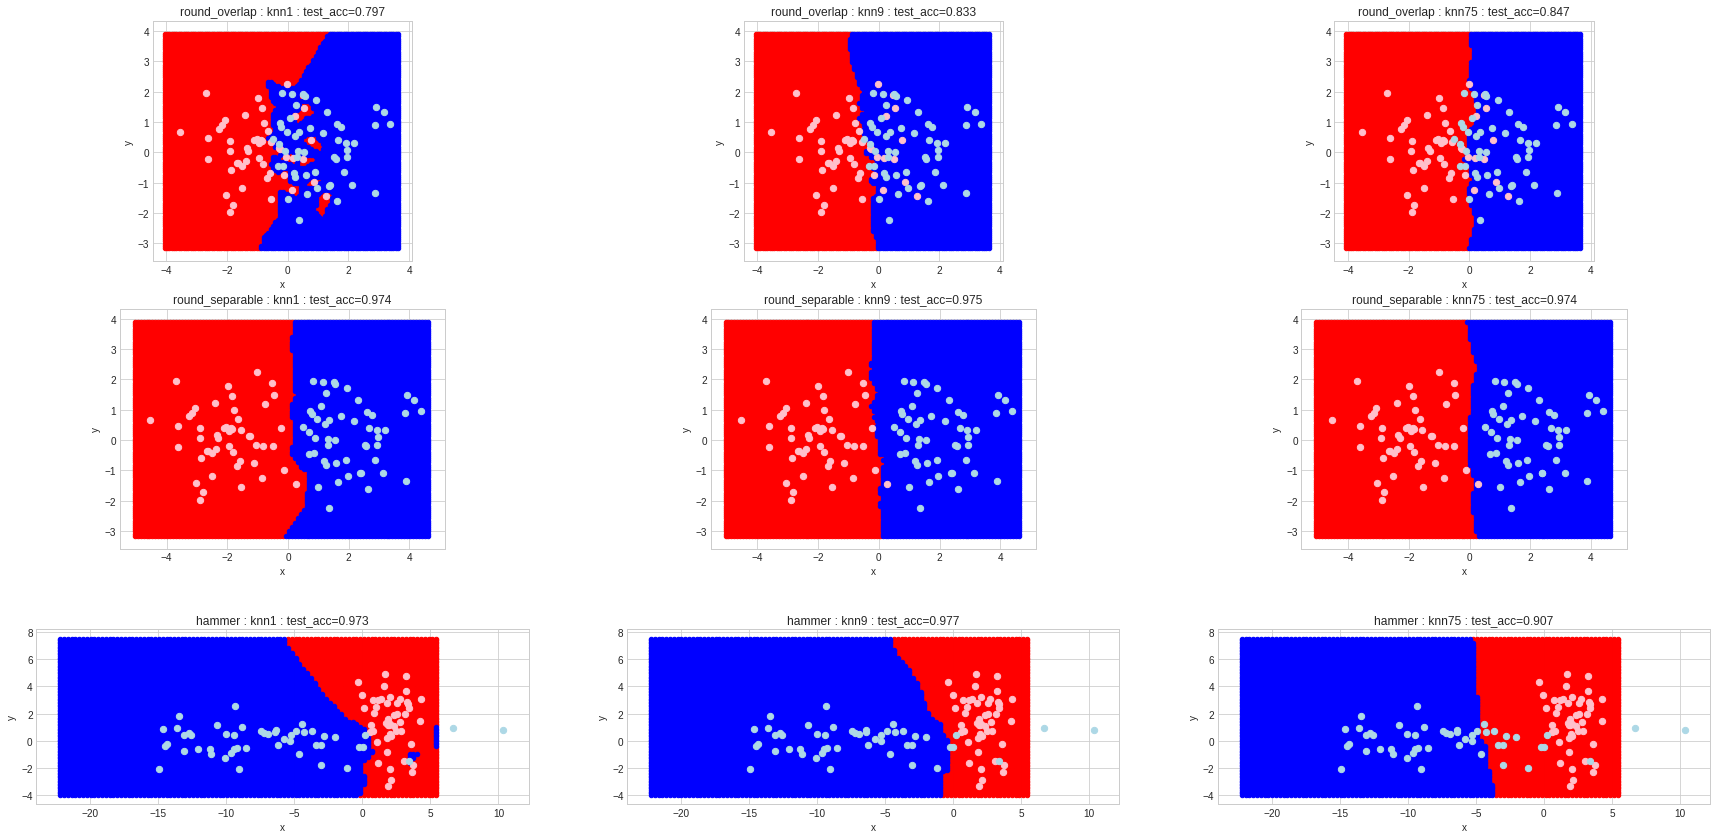

In [11]:
# YOUR CODE STARTS
plot_models_datasets(model_names=['knn1', 'knn9', 'knn75'], 
                     dataset_names=['round_overlap','round_separable', 'hammer'],
                     datasets_in_rows=True, plot_width=10, plot_height=5)
# YOUR CODE ENDS

Answer: ...

#### <font color='purple'>(b) On which of the datasets round_overlap, round_separable and hammer is K=75 performing good or bad (compared to other values of K)? Explain why (in 1 paragraph).</font>

In [ ]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

Answer: ...

#### <font color='purple'>(c) What are the best-performing values of K for datasets round_overlap, round_separable and hammer? Explain why (in 1 paragraph).</font>

In [ ]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

Answer: ...

#### <font color='purple'>(d) How does KNN performance change when changing the size of the training set? Study this on the datasets *round_overlap_20, _50, _100, _200, _500, _1000* and with K=3, K=9. Explain why (in 1 paragraph).</font>

In [ ]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

Answer: ...

### Comparison of many methods

Study the performance of various methods and come up with instructions for yourself on how you would choose the first learning algorithm to try on a future dataset (before running any code).
#### <font color='purple'>(e) Compare the performance of Naive Bayes against Perceptron. On which datasets (round_overlap, round_separable and hammer) does Naive Bayes perform better, worse, comparably to Perceptron? Explain why (in 1 paragraph).</font>

In [ ]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

Answer: ...

#### <font color='purple'>(f) Compare the performance of Naive Bayes against KNN. On which datasets (round_overlap, round_separable and hammer) does Naive Bayes perform better, worse, comparably to Perceptron? Explain why (in 1 paragraph). </font>

In [ ]:
# YOUR CODE STARTS
...
# YOUR CODE ENDS

Answer: ...